In [1]:
%matplotlib inline
from fastai import *

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.9191,  1.0000],
        [ 0.9011,  1.0000],
        [-0.3783,  1.0000],
        [ 0.6714,  1.0000],
        [ 0.8271,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

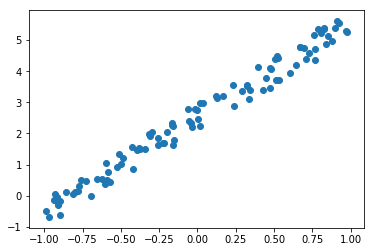

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [8]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(8.0800)

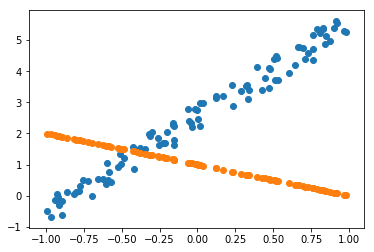

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(8.0800, grad_fn=<MeanBackward1>)
tensor(1.4280, grad_fn=<MeanBackward1>)
tensor(0.3785, grad_fn=<MeanBackward1>)
tensor(0.1412, grad_fn=<MeanBackward1>)
tensor(0.0863, grad_fn=<MeanBackward1>)
tensor(0.0736, grad_fn=<MeanBackward1>)
tensor(0.0707, grad_fn=<MeanBackward1>)
tensor(0.0700, grad_fn=<MeanBackward1>)
tensor(0.0699, grad_fn=<MeanBackward1>)
tensor(0.0698, grad_fn=<MeanBackward1>)


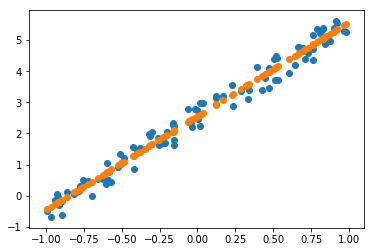

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [15]:
from matplotlib import animation, rc
rc('animation', html='html5')

You may need to uncomment the following to install the necessary plugin the first time you run this:<br/>(after you run following commands, make sure to restart the kernal for this notebook)

In [17]:
# ! sudo add-apt-repository -y ppa:mc3man/trusty-media  
# ! sudo apt-get update -y 
# ! sudo apt-get install -y ffmpeg  
# ! sudo apt-get install -y frei0r-plugins 

gpg: keyring `/tmp/tmpi9a38lpf/secring.gpg' created
gpg: keyring `/tmp/tmpi9a38lpf/pubring.gpg' created
gpg: requesting key ED8E640A from hkp server keyserver.ubuntu.com
gpg: /tmp/tmpi9a38lpf/trustdb.gpg: trustdb created
gpg: key ED8E640A: public key "Launchpad PPA for Doug McMahon" imported
gpg: no ultimately trusted keys found
gpg: Total number processed: 1
gpg:               imported: 1  (RSA: 1)
OK
Hit:1 http://us-west-2.ec2.archive.ubuntu.com/ubuntu xenial InRelease
Hit:2 http://us-west-2.ec2.archive.ubuntu.com/ubuntu xenial-updates InRelease  
Hit:3 http://us-west-2.ec2.archive.ubuntu.com/ubuntu xenial-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu xenial-security InRelease              
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu xenial InRelease
Ign:6 http://ppa.launchpad.net/mc3man/trusty-media/ubuntu xenial InRelease    
Hit:7 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu xenial InRelease
Ign:8 http://ppa.launchpad.net/mc3man/trusty-media/ubuntu xe

Preparing to unpack .../libavfilter-ffmpeg5_7%3a2.8.15-0ubuntu0.16.04.1_amd64.deb ...
Unpacking libavfilter-ffmpeg5:amd64 (7:2.8.15-0ubuntu0.16.04.1) ...
Selecting previously unselected package libsdl1.2debian:amd64.
Preparing to unpack .../libsdl1.2debian_1.2.15+dfsg1-3_amd64.deb ...
Unpacking libsdl1.2debian:amd64 (1.2.15+dfsg1-3) ...
Selecting previously unselected package libavdevice-ffmpeg56:amd64.
Preparing to unpack .../libavdevice-ffmpeg56_7%3a2.8.15-0ubuntu0.16.04.1_amd64.deb ...
Unpacking libavdevice-ffmpeg56:amd64 (7:2.8.15-0ubuntu0.16.04.1) ...
Selecting previously unselected package ffmpeg.
Preparing to unpack .../ffmpeg_7%3a2.8.15-0ubuntu0.16.04.1_amd64.deb ...
Unpacking ffmpeg (7:2.8.15-0ubuntu0.16.04.1) ...
Processing triggers for libc-bin (2.23-0ubuntu10) ...
Processing triggers for man-db (2.7.5-1) ...
Setting up libopenal-data (1:1.16.0-3) ...
Setting up libopenal1:amd64 (1:1.16.0-3) ...
Setting up libass5:amd64 (0.13.1-1) ...
Setting up libavresample-ffmpeg2:amd64 (

In [33]:
lr = 0.9

In [34]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.